In [ ]:
# https://pypi.python.org/pypi/pydot-
!apt install graphviz
!pip install graphviz
!pip install pydot

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from sklearn import datasets
from sklearn.datasets import make_moons
import graphviz
from sklearn.tree import export_graphviz
import pydot
from time import time
from matplotlib.colors import Normalize


# Función para visualizar un conjunto de datos en 2D
def plot_data(X, y):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")

# Función para visualizar de la superficie de decisión de un clasificador
def plot_decision_region(X, pred_fun):
    print(X.shape)
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 100)
    y_vals = np.linspace(min_y, max_y, 100)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 100, cmap = pl.cm.coolwarm, vmin= -1, vmax=2)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")

def gen_pred_fun(clf):
    def pred_fun(x1, x2):
        x = np.array([[x1, x2]])
        return clf.predict(x)[0]
    return pred_fun

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

def gen_pred_fun(clf):
    def pred_fun(x1, x2):
        x = np.array([[x1, x2]])
        return clf.predict(x)[0]
    return pred_fun

def plot_labels(n_folds, n_classes, list_labels):
    ind = np.arange(n_folds)
    width = 0.15

    countings = []
    for labels in list_labels:
        labels = np.array(labels)
        countings.append([np.count_nonzero(labels == x) for x in range(n_classes)])

    class_bars = []
    for cls in range(n_classes):
        class_bars.append([l[cls] for l in countings])

    fig, ax = pl.subplots()
    i = 0
    for class_bar in class_bars:
        ax.bar(ind + width*i, class_bar, width, label='Clase '+str(i))
        i += 1

    ax.set_xticks(ind + 2*width / 3)
    ax.set_xticklabels(['Pliegue {}'.format(k) for k in range(n_folds)])
    pl.legend(loc="best")
    pl.title("Etiquetas")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

file_path = 'nba.csv'
df = pd.read_csv(file_path)

df


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,G,GS,MPG,FG%,3p%,FT%,OFF,DEF,RPG,APG,SPG,BPG,TO,PF,PPG,Class
0,362,223,24.4,466,405,800,0.6,2.1,2.7,1.5,0.5,0.3,0.8,2.0,8.8,1
1,19,0,11.9,273,298,970,0.1,1.1,1.2,1.2,0.4,0.0,1.2,1.4,4.6,1
2,1148,1140,36.9,452,400,894,1.0,3.2,4.2,3.6,1.2,0.2,2.2,2.3,20.0,1
3,466,170,19.8,482,284,745,0.9,1.9,2.8,1.3,1.2,0.4,1.4,2.2,7.8,1
4,38,1,9.5,381,292,743,0.3,0.9,1.2,0.3,0.3,0.1,0.5,1.1,3.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,14,0,12.0,414,0,478,0.9,1.9,2.8,0.2,0.5,0.4,1.1,1.6,2.5,2
304,19,0,5.8,444,0,417,0.8,1.2,2.1,0.0,0.2,0.8,0.3,0.7,1.5,2
305,43,5,14.7,507,0,652,1.5,2.1,3.6,0.3,0.5,0.4,0.5,1.4,4.6,2
306,137,29,14.4,511,0,624,1.3,2.1,3.4,0.3,0.3,1.2,0.9,2.4,4.2,2


### Data Set

In [ ]:
X = df.drop(columns=['Class'])
y = np.array(df['Class'])
X

,G,GS,MPG,FG%,3p%,FT%,OFF,DEF,RPG,APG,SPG,BPG,TO,PF,PPG
0,362,223,24.4,466,405,800,0.6,2.1,2.7,1.5,0.5,0.3,0.8,2.0,8.8
1,19,0,11.9,273,298,970,0.1,1.1,1.2,1.2,0.4,0.0,1.2,1.4,4.6
2,1148,1140,36.9,452,400,894,1.0,3.2,4.2,3.6,1.2,0.2,2.2,2.3,20.0
3,466,170,19.8,482,284,745,0.9,1.9,2.8,1.3,1.2,0.4,1.4,2.2,7.8
4,38,1,9.5,381,292,743,0.3,0.9,1.2,0.3,0.3,0.1,0.5,1.1,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,14,0,12.0,414,0,478,0.9,1.9,2.8,0.2,0.5,0.4,1.1,1.6,2.5
304,19,0,5.8,444,0,417,0.8,1.2,2.1,0.0,0.2,0.8,0.3,0.7,1.5
305,43,5,14.7,507,0,652,1.5,2.1,3.6,0.3,0.5,0.4,0.5,1.4,4.6
306,137,29,14.4,511,0,624,1.3,2.1,3.4,0.3,0.3,1.2,0.9,2.4,4.2


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=1234,
                                                    stratify=y)

## Clases y etiquetas

In [ ]:
classes  = np.array(["1", "2"])
features = ["G","GS","MPG","FG%","3p%","FT%","OFF","DEF","RPG","APG","SPG","BPG","TO","PF","PPG"]

# Arbol

#### Definir el modelo

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy')

#### Ver los parametros

In [ ]:
classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

#### Entrenar el modelo

In [ ]:
classifier = classifier.fit(X_train, y_train)

#### Pintar el modelo

In [ ]:
#pl.figure(figsize = (10, 6))

##plot_decision_region(X, gen_pred_fun(classifier))
##plot_data(X_train, y_train)

In [ ]:
#pl.figure(figsize = (10, 6))
#plot_decision_region(X, gen_pred_fun(classifier))
#plot_data(X_test, y_test)

#### Score

In [ ]:
print('Error: {}'.format(1-classifier.score(X, y)))

Error: 0.016233766233766267


In [ ]:
print('Error: {}'.format(1-classifier.score(X_train, y_train)))

Error: 0.0


In [ ]:
print('Error: {}'.format(1-classifier.score(X_test, y_test)))

Error: 0.053763440860215006


## Dibujar arbol

In [ ]:
#type(features)

In [ ]:
train_error = []
generalization_error = []
max_depth_values = list(range(1, 21, 1))

for depth in max_depth_values:
    decision_tree = DecisionTreeClassifier(max_depth=depth)
    decision_tree.fit(X_train, y_train)
    train_error.append(1 - decision_tree.score(X_train, y_train))
    generalization_error.append(1 - decision_tree.score(X_test, y_test))

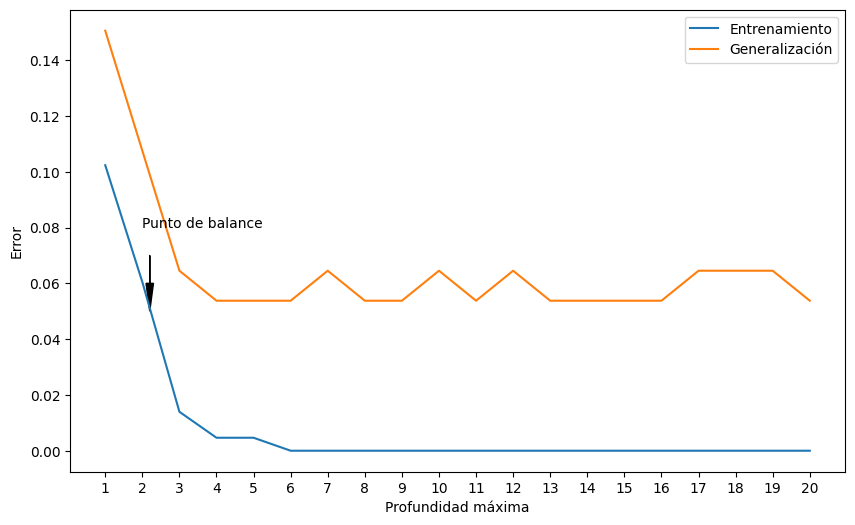

In [ ]:
pl.figure(figsize = (10, 6))

pl.plot(max_depth_values, train_error, label="Entrenamiento")
pl.plot(max_depth_values, generalization_error, label="Generalización")
pl.xticks(max_depth_values)
pl.xlabel("Profundidad máxima")
pl.ylabel("Error")
pl.arrow(2.2, 0.07, 0, -0.01, head_width=0.2, head_length=0.01, fc='k', ec='k')
pl.text(2, 0.08, 'Punto de balance')
pl.legend();

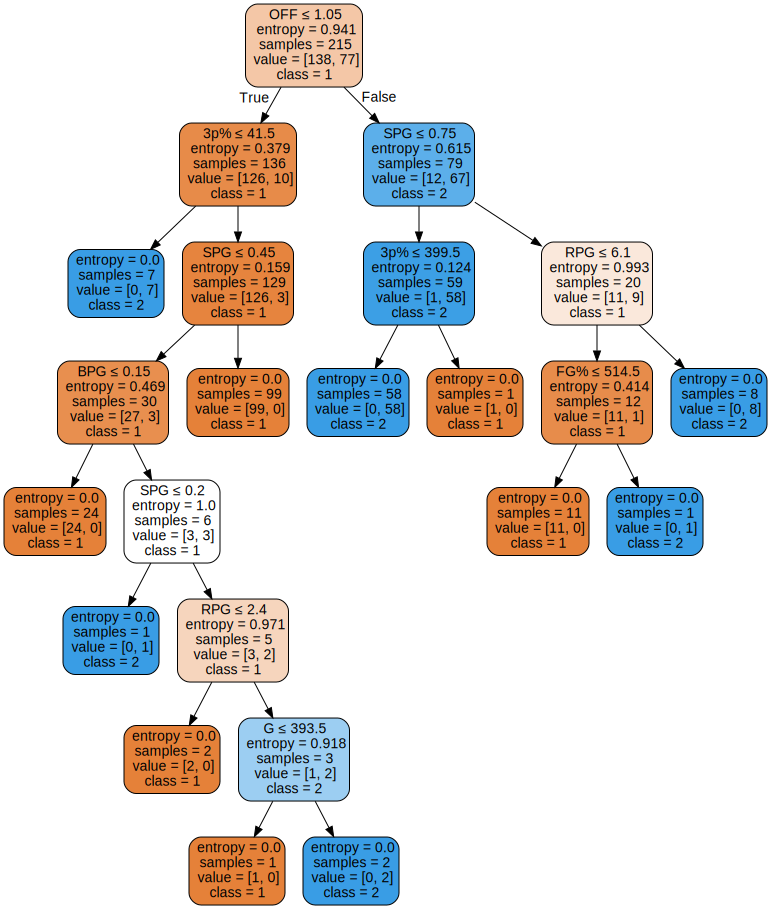

In [ ]:
from IPython.display import SVG
dot_data = export_graphviz(classifier, out_file=None,
                         feature_names=features,
                         class_names=classes,
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)
SVG(graph.pipe(format='svg'))

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tabulate import tabulate
prediction = classifier.predict(X_test)
cnf_matrix = confusion_matrix(y_test, prediction)
print(cnf_matrix)
y_test

[[55  4]
 [ 1 33]]


array([1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2,
       1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1,
       2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1])

AUC =  0.9513958125623131


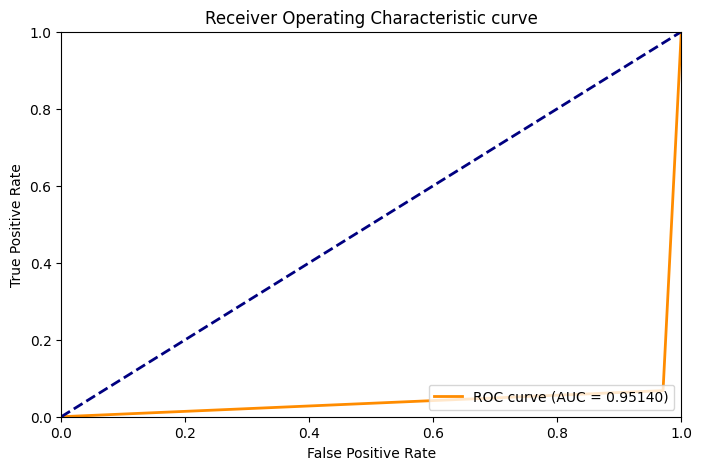

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test , prediction, pos_label=1)

from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test , prediction)
print("AUC = ", roc_auc)

plt.figure(figsize = (8,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn import metrics

print('Precision: {}'.format(metrics.precision_score(y_test, prediction)))
print('Recall: {}'.format(metrics.recall_score(y_test, prediction)))
print('F_1 score: {}'.format(metrics.f1_score(y_test, prediction)))

Precision: 0.9821428571428571
Recall: 0.9322033898305084
F_1 score: 0.9565217391304348


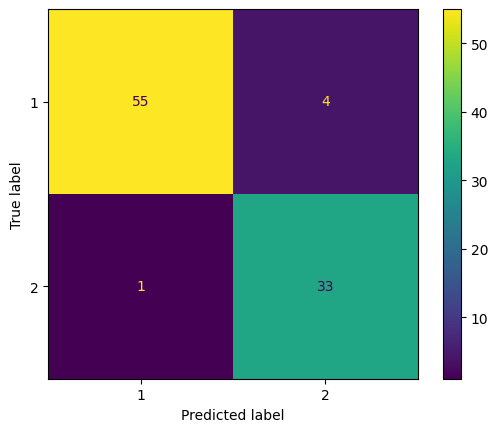

In [ ]:
disp= ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,display_labels=classes)
disp.plot()

# Bosque


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
rf = RandomForestClassifier(n_estimators=20, max_depth=5)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=20)

In [ ]:
##pl.figure(figsize = (10, 6))
##plot_decision_region(X_test, gen_pred_fun(rf))
##plot_data(X_test, y_test)

In [ ]:
print('Error en entrenamiento: {}'.format(1-rf.score(X_train, y_train)))
print('Error en prueba: {}'.format(1-rf.score(X_test, y_test)))

Error en entrenamiento: 0.0046511627906976605
Error en prueba: 0.021505376344086002


In [ ]:
max_features_params = [np.round(10**-1 * i, decimals=1) for i in range(1, 11, 1)]
param_grid = {'n_estimators': [2**i for i in range(2, 12, 1)], 'max_features': max_features_params}

In [ ]:
print('Número de árboles: {}'.format(param_grid['n_estimators']))

Número de árboles: [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]


In [ ]:
print('Porcentaje de características a usar: {}'.format(param_grid['max_features']))

Porcentaje de características a usar: [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


In [ ]:
start = time()
clf = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, verbose=1, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)
print("GridSearchCV tomó {} segundos usando {} configuraciones".format(time() - start,
                                                                         len(clf.cv_results_['params'])))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
GridSearchCV tomó 376.50953102111816 segundos usando 100 configuraciones


In [ ]:
scores = clf.cv_results_['mean_test_score'].reshape(len(param_grid['max_features']),
                                                    len(param_grid['n_estimators']))

In [ ]:
scores

array([[0.91162791, 0.95348837, 0.96744186, 0.97674419, 0.97674419,
        0.97674419, 0.97209302, 0.97674419, 0.97674419, 0.97674419],
       [0.93023256, 0.95813953, 0.96744186, 0.97209302, 0.97674419,
        0.97209302, 0.97209302, 0.97209302, 0.97209302, 0.97209302],
       [0.93953488, 0.94883721, 0.95813953, 0.97209302, 0.97209302,
        0.96744186, 0.97209302, 0.96744186, 0.97209302, 0.96744186],
       [0.95348837, 0.95813953, 0.95813953, 0.96744186, 0.97209302,
        0.97209302, 0.97209302, 0.97209302, 0.97209302, 0.97209302],
       [0.93023256, 0.95348837, 0.96744186, 0.97209302, 0.97209302,
        0.96744186, 0.97209302, 0.96744186, 0.96744186, 0.96744186],
       [0.94883721, 0.96744186, 0.9627907 , 0.97209302, 0.96744186,
        0.97209302, 0.9627907 , 0.9627907 , 0.96744186, 0.96744186],
       [0.92093023, 0.95348837, 0.9627907 , 0.96744186, 0.96744186,
        0.97209302, 0.96744186, 0.97209302, 0.96744186, 0.96744186],
       [0.93023256, 0.95813953, 0.9488372

Se visualizan los parametros

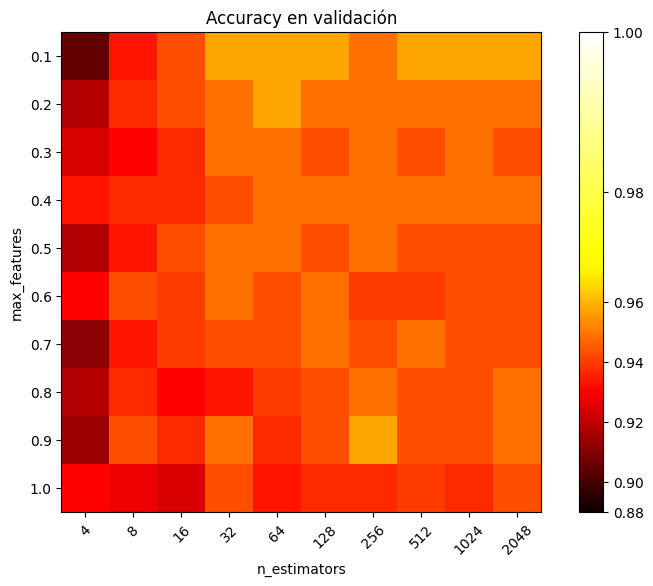

In [ ]:
pl.figure(figsize=(10, 6))
pl.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
pl.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.89, midpoint=0.97, vmax=1.))
pl.xlabel('n_estimators')
pl.ylabel('max_features')
pl.colorbar()
pl.xticks(np.arange(len(param_grid['n_estimators'])), param_grid['n_estimators'], rotation=45)
pl.yticks(np.arange(len(param_grid['max_features'])), param_grid['max_features'])
pl.title('Accuracy en validación')
pl.show()

In [ ]:
clf.best_score_

0.9767441860465116

In [ ]:
clf.best_params_

{'max_features': 0.1, 'n_estimators': 32}

In [ ]:
clf.score(X_test, y_test)

0.967741935483871

In [ ]:
clf.score(X_train, y_train)

1.0

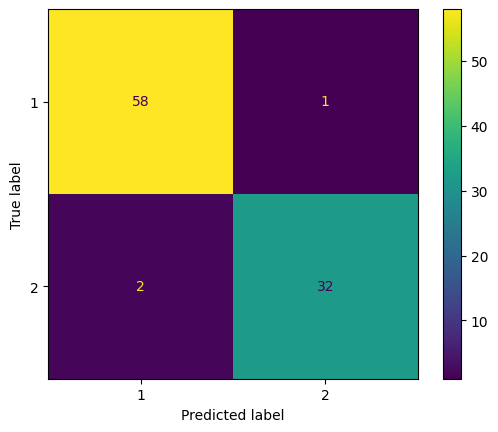

In [ ]:
pred=clf.predict(X_test)
cm=confusion_matrix(y_test,pred)
cm
cdm= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
cdm.plot()